# Linear Regression Train/Test Split



Notebook based on Anaconda Getting Started with Machine Learning Course - Instructor: Thomas Neild
available at: https://learning.anaconda.cloud/getting-started-with-ai-ml/20538
Raw Data available from: https://github.com/thomasnield/machine-learning-demo-data

## Exercise 1: Simple Linear Regression Example

linear Regression is a Machine Learning Model used to predict the value of a variable (the dependant variable) based on the value of another variable (the independant variable). Linear regression is a great choice if you are carefully limiting the number of variables and you have a linear relationship between the known data and the variables that you want to predict. 

Objectives:

1. Fit a line to data
2. Measure loss with Residuals and Sum of Squares
3. Use SciKit-Learn to fit a linear regression
4. Examine Linear Regression with R-squared and Train/Test Splits

Machine Learning is mostly focused on two tasks: Regression, and Classification. 


Calculating Residuals
Residuals are the difference between the expected Y value on a line and the actual Y value


In [8]:
x_data = [ 1.0, 2.0, 3.0 ]
y_actuals = [ 1.2, 1.25, 2.0 ]

# Slope and Y-intercept coefficients

In simple linear regression, the slope, also known as the regression coefficient, is the ratio of the rise to the run on the regression line for two corresponding values of x and y. The slope is represented by the symbol b1 in the equation ŷ = b0 + b1x, 
where:
b0: is a constant
b1: is the slope (regression coefficient)
x: is the value of the independent input variable
ŷ: is the predicted value of the dependent output variable

The slope can be calculated by dividing the standard deviation of y values by the standard deviation of x values, and then multiplying this by the correlation between x and y. The slope can be negative, which would show a line going downhill rather than upwards

What is y = mx + b? 
y = mx + b is the slope-intercept form of the equation of a straight line. In the equation y = mx + b, m is the slope of the line and b is the intercept. x and y represent the distance of the line from the x-axis and y-axis, respectively.

In [ ]:
Declare slope and intercept coefficients

In [9]:
m = .368421
b = .587719

Plot the scatterplot with the line

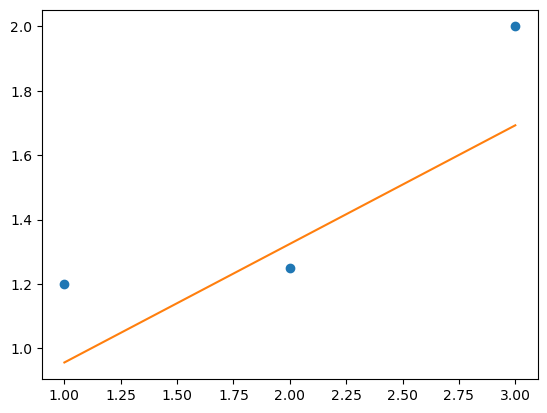

In [10]:
import matplotlib.pyplot as plt

# show in chart
plt.plot(x_data, y_actuals, 'o') # scatterplot
plt.plot(x_data, [m*x+b for x in x_data]) # line
plt.show()

Calculate predicted y-values

In [14]:
y_predicts = [ m*x + b for x in x_data ] 

Print residuals

In [15]:
for (y_actual, y_predict) in zip(y_actuals, y_predicts): 
    residual = y_actual - y_predict
    print("RESIDUAL: ", residual)

RESIDUAL:  0.24385999999999997
RESIDUAL:  -0.0745610000000001
RESIDUAL:  0.30701800000000024


## Exercise 2: Calculating Sum of Squares

Declare 3 data points as training data

In [16]:
x_data = [ 1.0, 2.0, 3.0 ]
y_actuals = [ 1.2, 1.25, 2.0 ]

Declare slope and intercept coefficients

In [17]:
m = .368421
b = .587719

Plot the scatterplot with the line

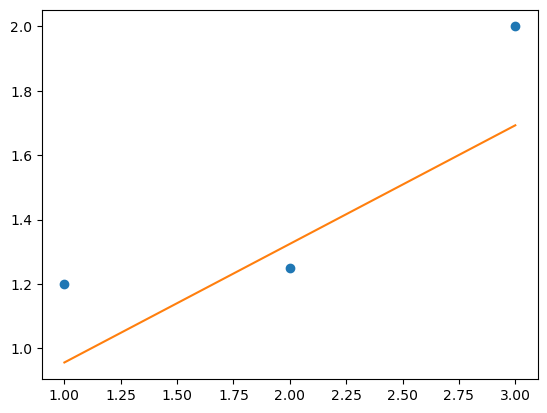

In [18]:
import matplotlib.pyplot as plt

# show in chart
plt.plot(x_data, y_actuals, 'o') # scatterplot
plt.plot(x_data, [m*x+b for x in x_data]) # line
plt.show()

Calculate predicted y-values

In [19]:
y_predicts = [ m*x + b for x in x_data ] 

In [20]:
sum_of_squares = 0

for (y_actual, y_predict) in zip(y_actuals, y_predicts): 
    residual = y_actual - y_predict
    sum_of_squares += residual ** 2

print("SUM OF SQUARES: ", sum_of_squares)

SUM OF SQUARES:  0.15928709464500013


## Exercise 3 : Linear Regression Example using data from https://github.com/thomasnield/machine-learning-demo-data/tree/master/regression

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
# Load the data
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")
df

,x,y
0,99.504842,159.464415
1,44.662766,50.508179
2,66.631337,91.677570
3,74.663878,121.276874
4,57.554853,77.660511
...,...,...
375,187.856720,314.745930
376,54.705039,74.161177
377,137.863407,222.073346
378,128.667926,226.704162


Extract the $ X $ and $ Y $ columns from the dataframe.

In [4]:
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]


Separate out the training and testing data.

In [5]:
# Separate training and testing data to evaluate performance and reduce overfitting
# This leaves a third of the data out for testing
# Set a random seed just to make the randomly selected split consistent
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1.0/3.0, random_state=10)


Fit a linear regression with the training data and calculate the $ R^2 $ for the test dataset. 

In [6]:
model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("R^2: %.3f" % result)

R^2: 0.994


Plot the linear regression against the scatterplot

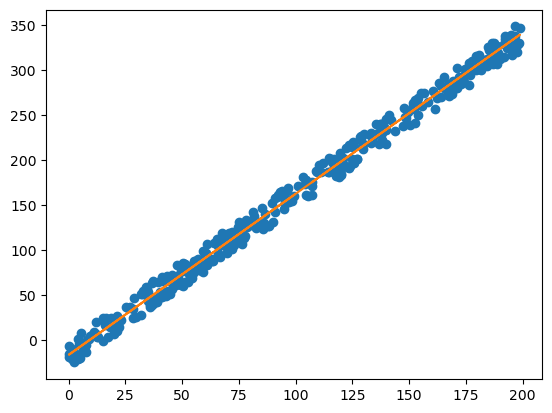

In [7]:
import matplotlib.pyplot as plt

# show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, model.coef_.flatten()*X+model.intercept_.flatten()) # line
plt.show()